#**BIKE SHARING ASSIGNMENT**

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

#Data understanding

In [64]:
#reading the dataset
day_df=pd.read_csv('/content/day.csv')

In [65]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [66]:
day_df.shape #giving total number of rows and columns

(730, 16)

In [133]:
day_df.info() # checking about detailed information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    bool   
 9   season_summer          730 non-null    bool   
 10  season_winter          730 non-null    bool   
 11  mnth_aug               730 non-null    bool   
 12  mnth_dec               730 non-null    bool   
 13  mnth_feb               730 non-null    bool   
 14  mnth_jan               730 non-null    bool   
 15  mnth_j

#**DATA CLEANING**

##The columns that are not useful are dropped

In [68]:
# checking the null values in column data
day_df.isnull().mean()*100

,0
instant,0.0
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0


## No null values are found

In [69]:
# checking for duplicates
day_df.duplicated().sum()

np.int64(0)

In [70]:
# checking the unique values
day_df.nunique()

,0
instant,730
dteday,730
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,498


In [71]:
day_df.describe() # statistical information of the dataset

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [72]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data cleaning

In [73]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.
day_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [74]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [75]:
# mapping the numeric catogorical variables to their values
day_df['season']=day_df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
day_df['mnth']=day_df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
day_df['weekday']=day_df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
day_df['weathersit']=day_df['weathersit'].map({1:'clear',2:'misty',3:'light_rain',4:'heavy_rain'})


In [76]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Data visualisation

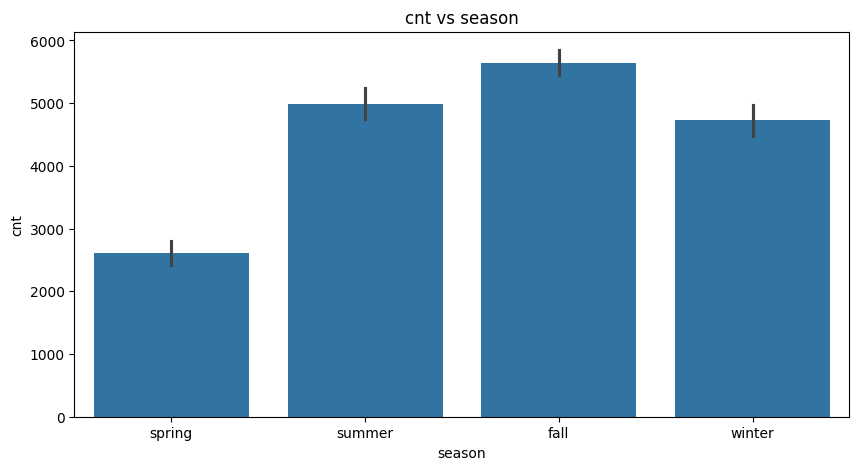

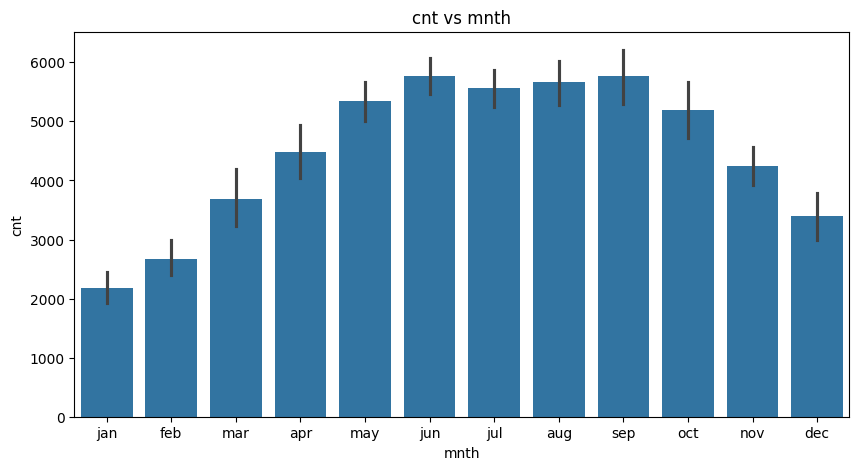

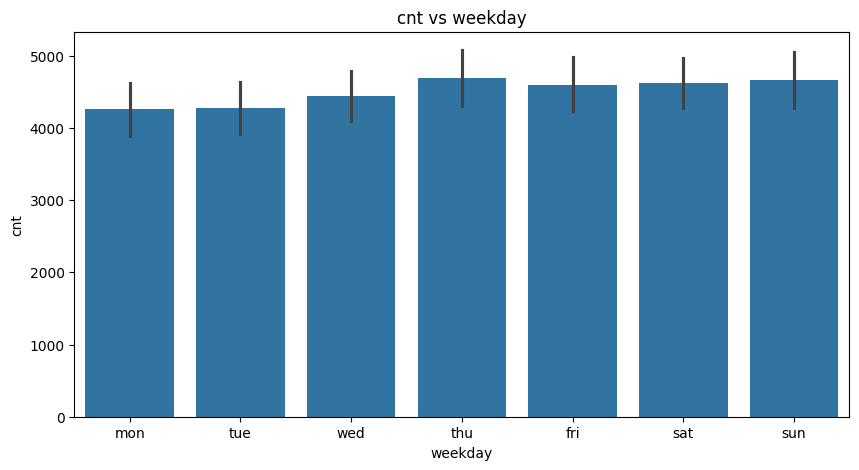

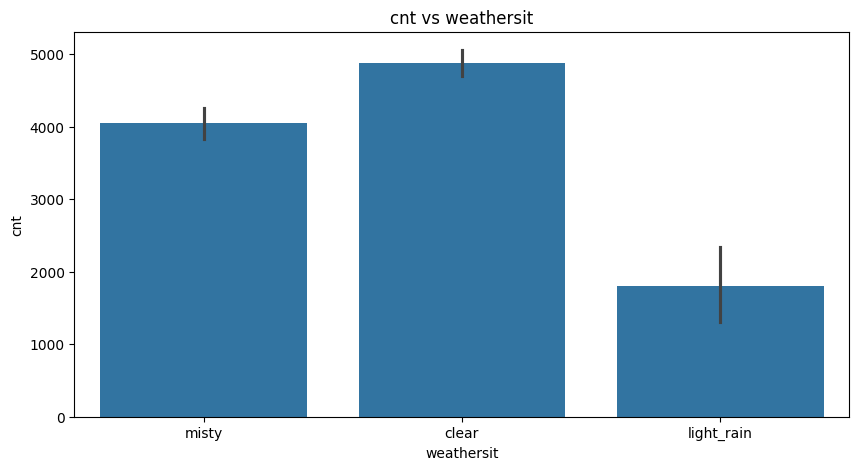

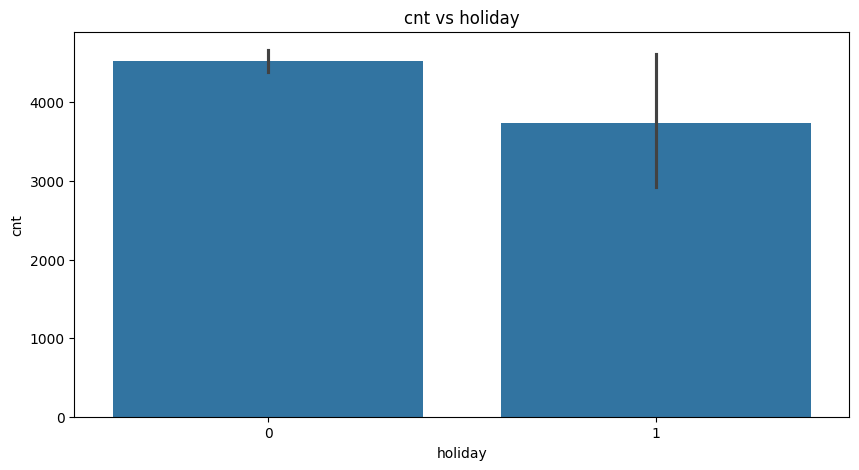

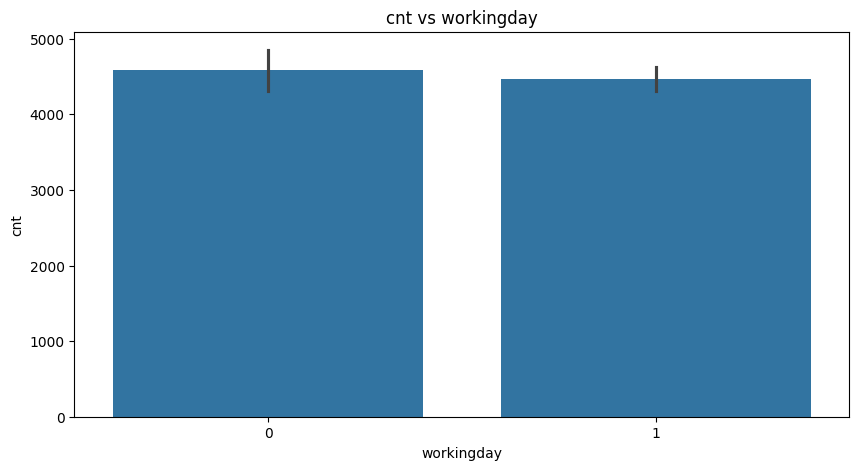

In [77]:
# plotting bar plot between cnt and categorical variables
for feature in ['season','mnth','weekday','weathersit','holiday','workingday']:
    plt.figure(figsize=(10,5))
    sns.barplot(x=feature,y='cnt',data=day_df)
    plt.title(f'cnt vs {feature}')

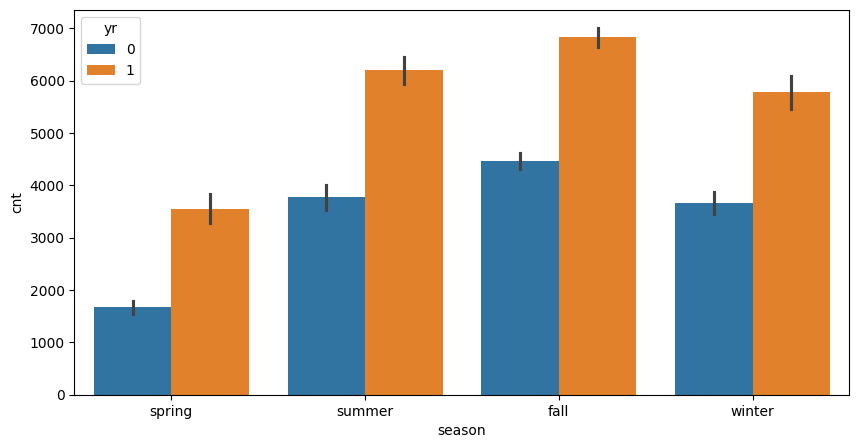

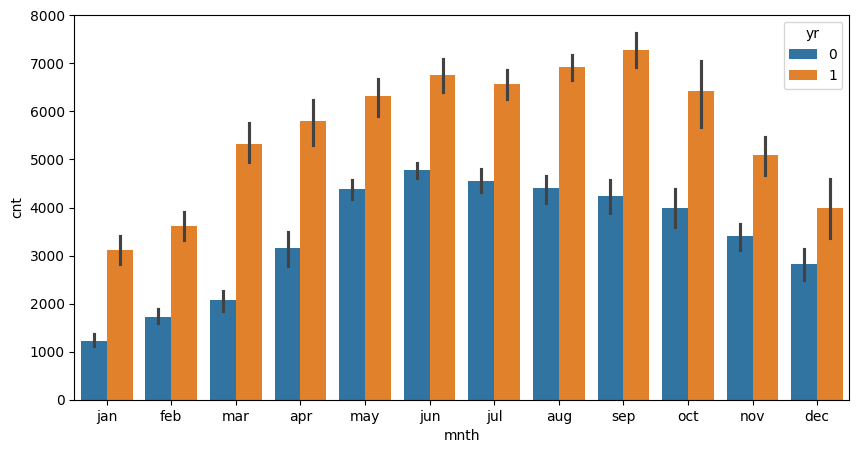

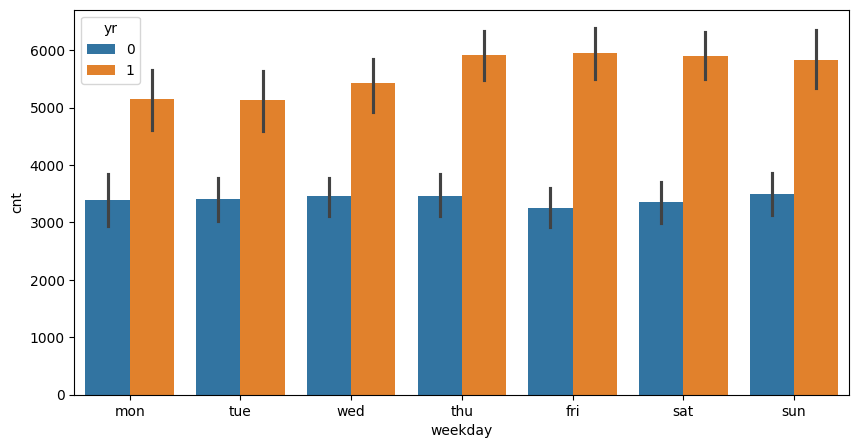

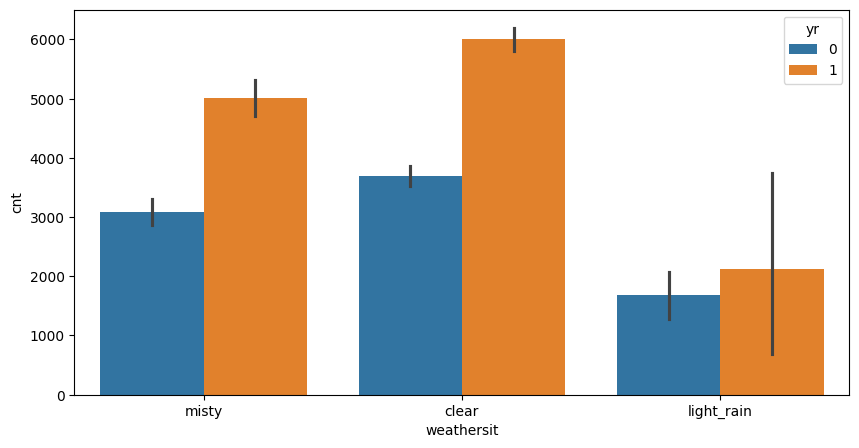

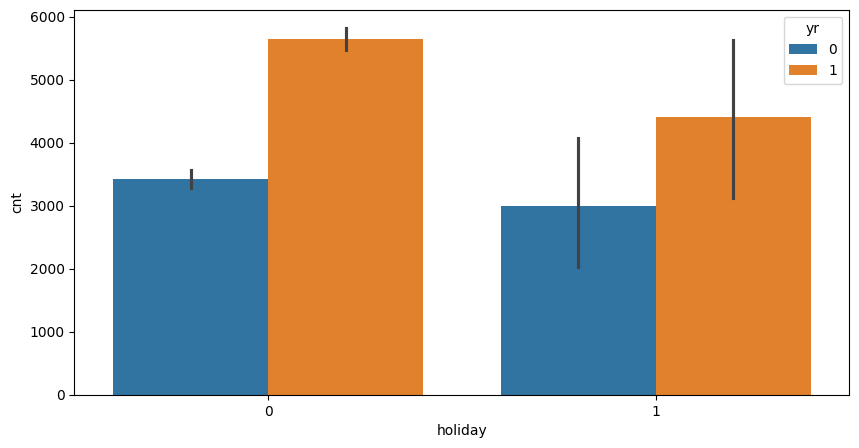

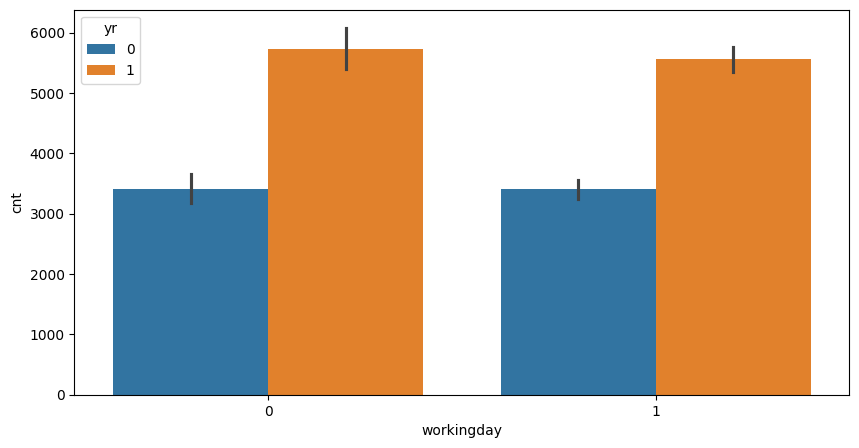

In [78]:
# plotting bar chart between categorical and target variable with hue as yr
for feature in ['season','mnth','weekday','weathersit','holiday','workingday']:
    plt.figure(figsize=(10,5))
    sns.barplot(x=feature,y='cnt',hue='yr',data=day_df)

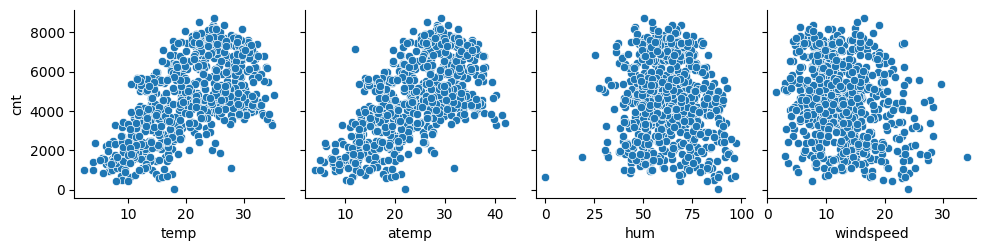

In [79]:
# visualizing the numerical columns
sns.pairplot(day_df,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt')
plt.show()

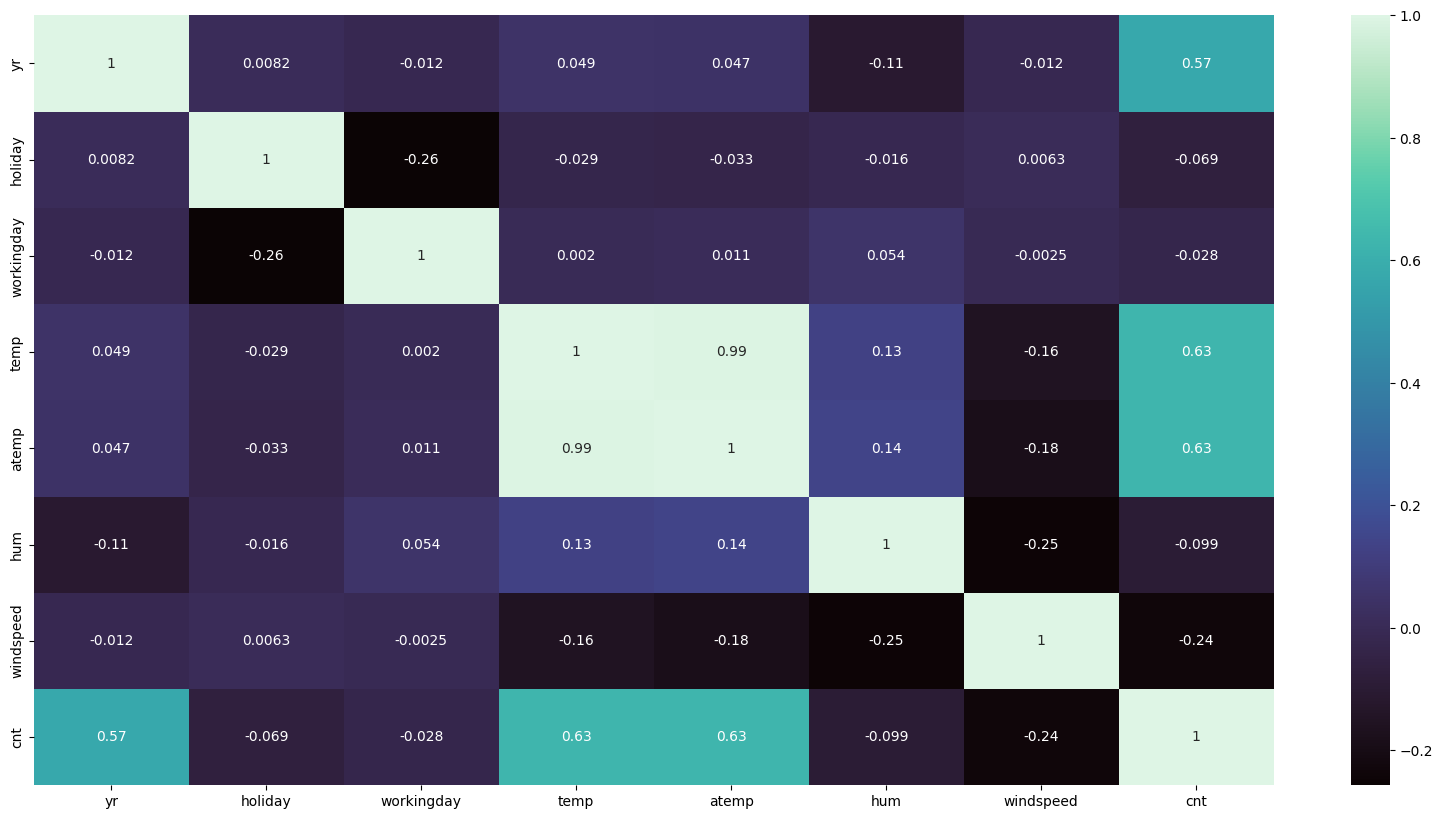

In [80]:
# plotting heatmap for dataframe
plt.figure(figsize=(20,10))
num_features= day_df.select_dtypes(include=np.number)
sns.heatmap(num_features.corr(),annot=True,cmap='mako')
plt.show()

## Data prepration

In [81]:
# creating dummy variables for categorical features.
day_df=pd.get_dummies(data=day_df,columns=["season","mnth","weekday"],drop_first=True)
day_df=pd.get_dummies(data=day_df,columns=["weathersit"])

In [82]:
day_df.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_clear', 'weathersit_light_rain',
       'weathersit_misty'],
      dtype='object')

#SPLITTING DATA INTO TRAIN AND TEST DATA

In [83]:
day_df.shape #gives the updated number of rows and columns

(730, 31)

In [84]:
X = day_df.drop(columns='cnt')  # X contains all features except the target
y = day_df['cnt']               # y contains the target variable

# Split into training and testing sets with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [85]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_light_rain,weathersit_misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,1,14.902598,17.68695,69.6087,16.652113,True,False,False,...,False,False,False,False,False,True,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,True,False,False,...,False,False,False,False,False,False,True,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,True,False,False,...,False,False,False,False,True,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [86]:
#Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


In [87]:
scaler = MinMaxScaler()
X_train = X_train.assign(**{
    col: scaler.fit_transform(X_train[[col]])
    for col in ['temp', 'atemp', 'hum', 'windspeed']
})

In [88]:
X_train.describe() # gives the statistical information of the dataset

,yr,holiday,workingday,temp,atemp,hum,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_light_rain,weathersit_misty
683,1,0,1,0.327133,0.322150,0.639330,0.327101,False,False,True,...,False,False,False,False,False,False,False,False,False,True
645,1,1,0,0.403972,0.404998,0.731215,0.419004,False,False,True,...,False,False,False,False,False,True,False,False,False,True
163,0,0,1,0.717562,0.685963,0.509660,0.708724,False,True,False,...,False,False,False,False,False,False,True,True,False,False
360,0,0,1,0.331287,0.326273,0.785745,0.415925,True,False,False,...,False,False,False,False,True,False,False,False,False,True
640,1,0,1,0.745598,0.682653,0.817947,0.110593,False,False,True,...,False,False,False,False,True,False,False,False,False,True


##Heatmap for correlation between numeric variables

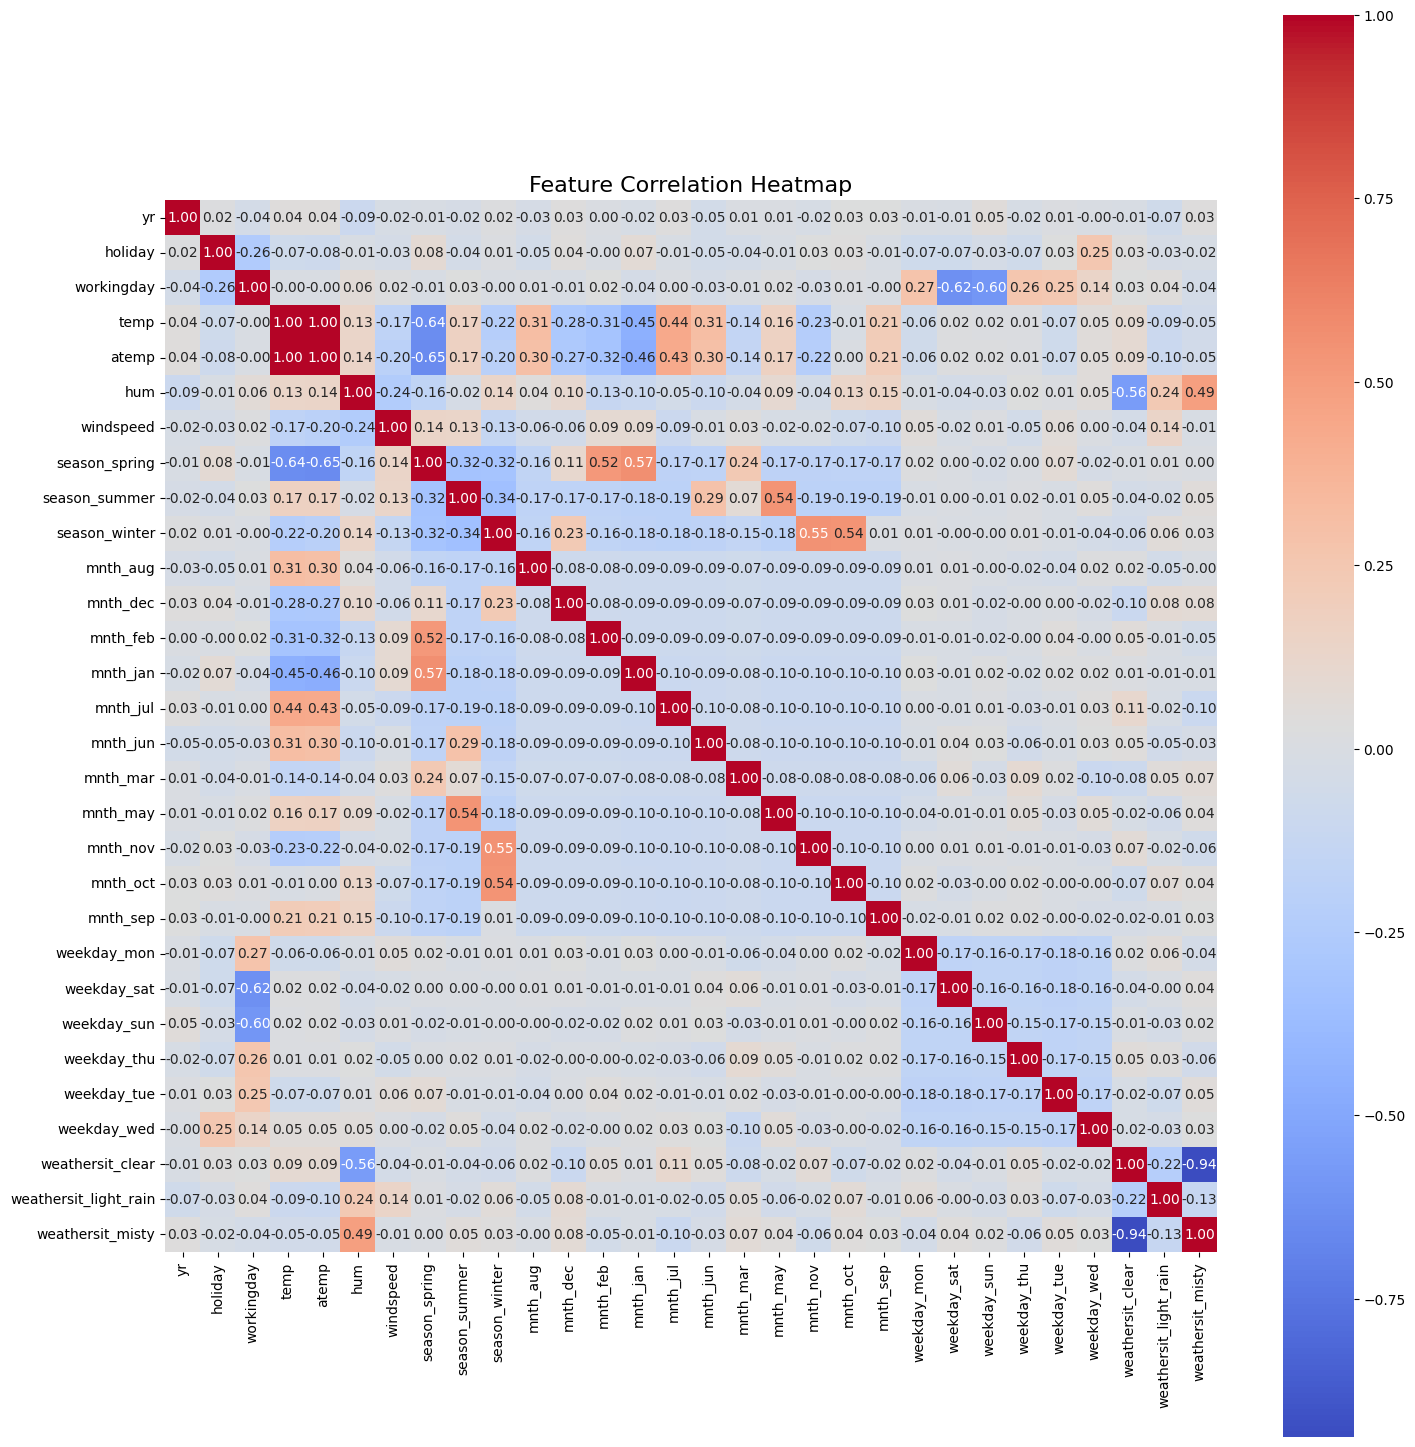

In [90]:
corr_matrix = X_train.corr()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 15))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=ax)

# Add a title (optional)
ax.set_title("Feature Correlation Heatmap", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

#BUILD MODEL USING RFE

In [91]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [92]:
# Cut down number of features to 15 using automated approach
rfe = RFE(lr, n_features_to_select=15).fit(X_train, y_train)

In [93]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.False_, np.int64(13)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.False_, np.int64(8)),
 ('season_winter', np.True_, np.int64(1)),
 ('mnth_aug', np.False_, np.int64(12)),
 ('mnth_dec', np.True_, np.int64(1)),
 ('mnth_feb', np.False_, np.int64(9)),
 ('mnth_jan', np.False_, np.int64(15)),
 ('mnth_jul', np.True_, np.int64(1)),
 ('mnth_jun', np.False_, np.int64(10)),
 ('mnth_mar', np.True_, np.int64(1)),
 ('mnth_may', np.False_, np.int64(2)),
 ('mnth_nov', np.True_, np.int64(1)),
 ('mnth_oct', np.False_, np.int64(4)),
 ('mnth_sep', np.True_, np.int64(1)),
 ('weekday_mon', np.False_, np.int64(5)),
 ('weekday_sat', np.False_, np.int64(14)),
 ('weekday_sun', np.False_, np.int64(11)),
 ('weekday_thu', np.False_, np.int64(16)),
 ('weekday_tue', np.

In [94]:
selected_columns = [col for col, selected in zip(X_train.columns, rfe.support_) if selected]
dropped_columns = [col for col, selected in zip(X_train.columns, rfe.support_) if not selected]

print('Selected Columns:', selected_columns)
print('Dropped Columns:', dropped_columns)

Selected Columns: ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov', 'mnth_sep', 'weathersit_clear', 'weathersit_light_rain']
Dropped Columns: ['workingday', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_misty']


In [95]:
X_train_rfe = X_train[selected_columns]
X_train_rfe = sm.add_constant(X_train_rfe)

In [96]:
# A Function is defined using statesmodel api to build a model.
def build_model(features, X=X_train, y=y_train):
    # Add a constant (intercept) to the model
    X_with_const = sm.add_constant(X[features], has_constant='add')

    # Build and fit the OLS model
    model = sm.OLS(y, X_with_const).fit()

    # Display summary
    print(model.summary())

    return model

In [100]:
# Calculates Variance Inflation Factors (VIF) for the given list of features to detect multicollinearity.
def calculate_vif(data, cols):
    """Returns VIF DataFrame for the specified columns."""
    df = data[cols].copy()
    vif_data = pd.DataFrame({
        'Feature': df.columns,
        'VIF': [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    })
    return vif_data.round(2).sort_values(by='VIF', ascending=False)

# Example usage:
vif_result = calculate_vif(X_train, ['temp', 'atemp', 'hum', 'windspeed'])
print(vif_result)

     Feature      VIF
1      atemp  1116.95
0       temp  1081.86
2        hum     9.58
3  windspeed     4.41


In [101]:
# Output the features chosen by RFE for manual review and further elimination.
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sep', 'weathersit_clear', 'weathersit_light_rain'],
      dtype='object')

In [104]:
# Extracting all appropriate features and storing them in the assigned variable
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul',  'weekday_sat']]

In [105]:
X_train_rfe.shape

(511, 12)

#MODEL 1

In [108]:
# generating the first model.

important_features = [
    'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
    'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul',
    'weekday_sat']

model = build_model(important_features)
vif_df = calculate_vif(X_train, important_features)
print(vif_df)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

#MODEL 2

In [109]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul',  'weekday_sat']
build_model(cols)
get_vif(cols)

KeyError: "['mnth_sept', 'weathersit_bad', 'weathersit_moderate'] not in index"

#MODEL 3

In [111]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul','weekday_sat']
build_model(cols)
get_vif(cols)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

#MODEL 4

In [112]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul',  'weekday_sat']
build_model(cols)
get_vif(cols)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

#MODEL 5

In [113]:
# Dropping the variable mnth_jul,temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weekday_sat']
build_model(cols)
get_vif(cols)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

#MODEL 6

In [114]:
## Trying to replace July with spring as both were highly correlated
#removing of working_day,Summer and adding temp

cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter',  'weekday_sun',
       'temp']
build_model(cols6)
get_vif(cols6)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [115]:
# Use all columns to build a model that helps pick the most important features
def build_linear_model(X, y):
    """Fits a Linear Regression model and returns the trained model."""
    model = LinearRegression()
    model.fit(X, y)
    return model

In [116]:
# Now let's use sklearn to create the final model with the chosen columns
lr = LinearRegression()
lr.fit(X_train[cols6], y_train)

# Display the intercept and coefficients
print(f"Intercept: {lr.intercept_}")
print(f"Coefficients: {lr.coef_}")

Intercept: 1161.3191468717719
Coefficients: [ 2023.98466299 -1061.71678372  -578.55933689   505.20177076
   215.41407146  4504.15549629]


## **RESIDUAL** **ANALYSIS**

In [117]:
y_train_pred = lr.predict(X_train[cols6])

In [118]:
# Visualize the error terms using a histogram
def plot_residual_distribution(actual, predicted):
    residuals = actual - predicted

    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, bins=25, kde=True, color='cornflowerblue', edgecolor='black')

    plt.axvline(0, color='red', linestyle='--', linewidth=1)
    plt.title('Distribution of Residuals', fontsize=14)
    plt.xlabel('Residuals', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

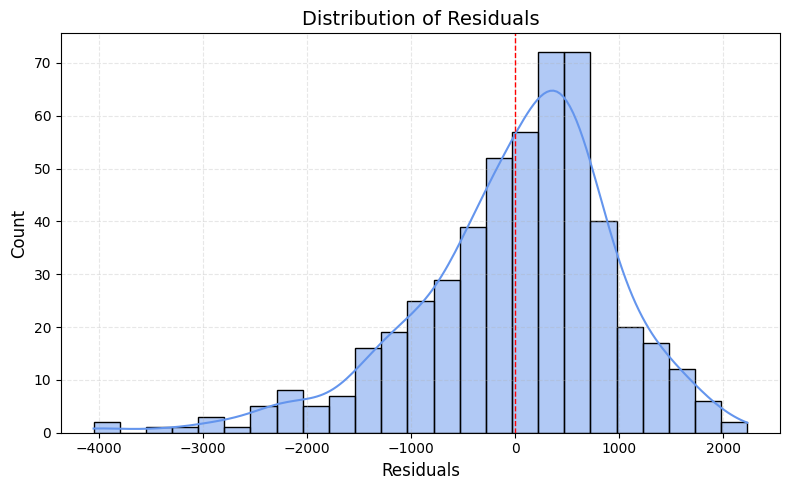

In [120]:
plot_residual_distribution(y_train, y_train_pred)

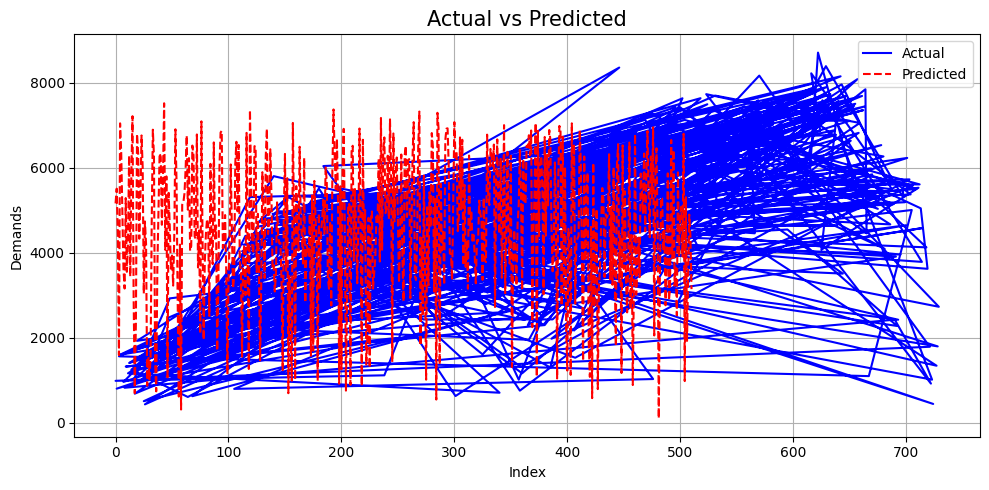

In [124]:
# The graph of actual vs predicted is now plotted.
plt.figure(figsize=(10, 5))  # Optional: sets figure size
plt.plot(y_train, label='Actual', color='blue')
plt.plot(y_train_pred, label='Predicted', color='red', linestyle='--')

plt.title('Actual vs Predicted', fontsize=15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#**MODEL PREDICTIONS**

### Coefficient of determination (R²) for training set predictions


In [125]:
r2_score(y_train,y_train_pred)

0.7564412702584677

### # Generate predicted values for the test set


In [126]:

num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- atemp
- hum
- temp


In [130]:
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter',  'weekday_sun','temp']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols6])


**R SQUARED VALUE FOR TEST PREDICTION**

In [131]:
y_pred=y_test_pred
r2_score(y_test, y_pred)

-2313.588238695271

Text(0, 0.5, 'y_pred')

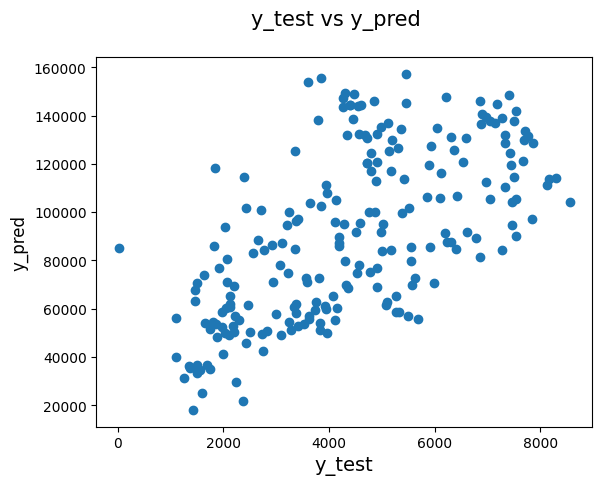

In [132]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('y_pred', fontsize = 12)

The analysis highlighted several key factors that significantly influence shared bike demand:

Holiday status

Temperature, humidity, and windspeed

Seasonality

Specific months: January, July, September, November, and December

Year

Day of the week: Sunday

Weather conditions such as light snow and misty/cloudy skies

These variables serve as strong predictors for rental demand and can be leveraged to develop forecasting models, optimize resource planning, and guide operational strategies.